In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path = 'sas_data1.csv'

In [20]:
df = pd.read_csv(path)

In [21]:
df.head()

,x-axis,1,2,3,4
0,second,Volt,Volt,Volt,Volt
1,-1.000000E+00,+1.254670E+00,+491.522E-03,+3.952443E+00,-19.433E-03
2,-999.000E-03,+1.257605E+00,+494.919E-03,+4.002695E+00,-19.433E-03
3,-998.000E-03,+1.261203E+00,+498.386E-03,+4.052946E+00,-19.433E-03
4,-997.000E-03,+1.266771E+00,+504.255E-03,+4.103197E+00,-19.433E-03


In [22]:
time = (df['x-axis'].to_numpy()[1:]).astype('float64')
signal1 = (df['1'].to_numpy()[1:]).astype('float64')
signal2 = (df['2'].to_numpy()[1:]).astype('float64')
ramp = (df['3'].to_numpy()[1:]).astype('float64')

In [34]:
error = signal2-signal1

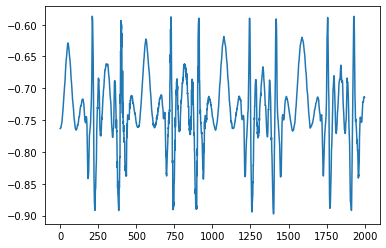

In [35]:
plt.plot(error)

In [36]:
error[np.isnan(error)] = 0
ramp[np.isnan(ramp)] = 0
signal1[np.isnan(signal1)] = 0
signal2[np.isnan(signal2)] = 0

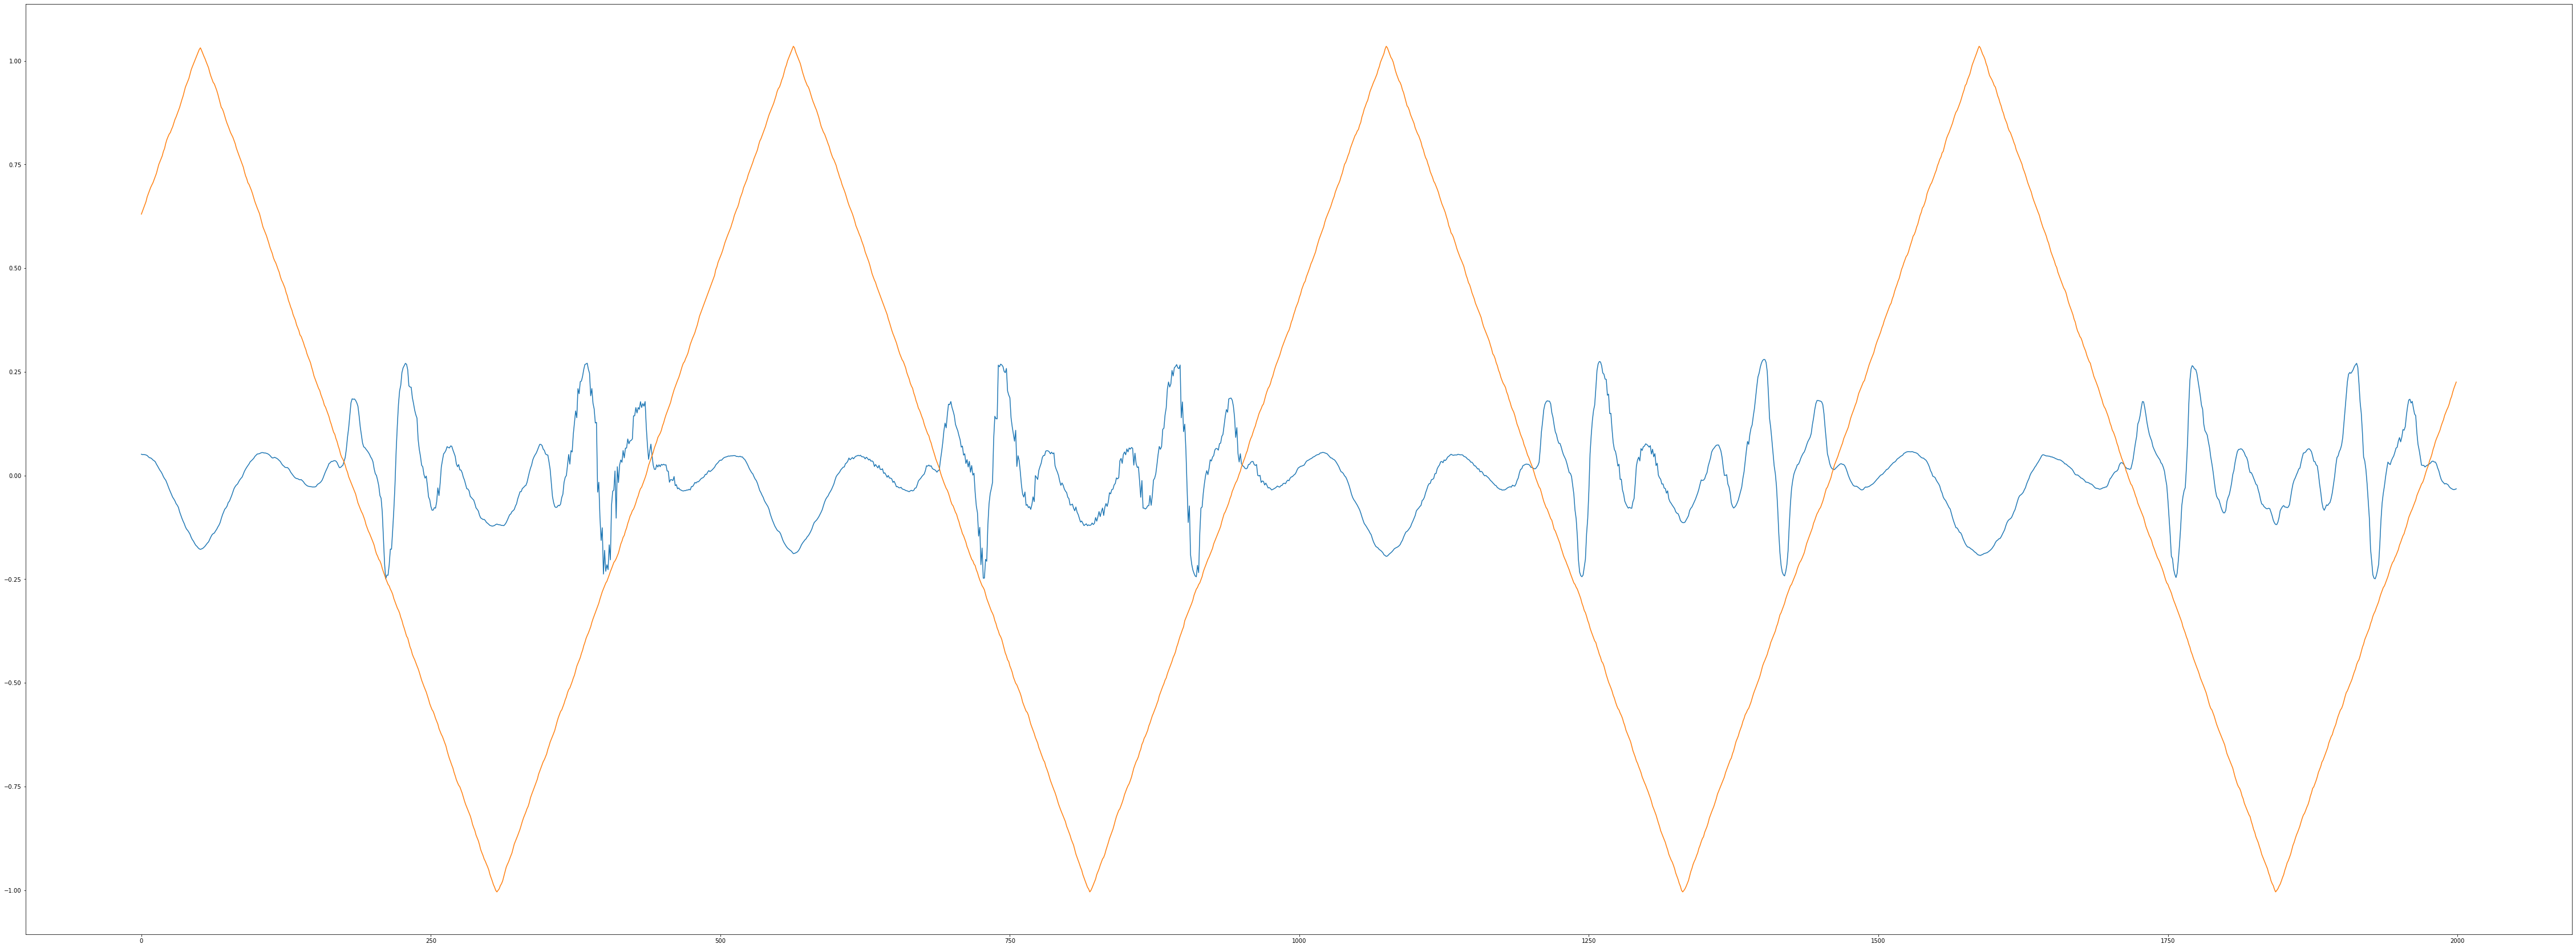

In [37]:
fig, ax = plt.subplots(figsize=(80,30))
ax.plot((error-np.mean(error))/np.max(error))
ax.plot((ramp - np.mean(ramp))/np.max(ramp))
# ax.plot((signal2 - np.mean(signal2))/np.max(signal2)*2)

In [38]:
avg_error = []
avg_filter = [0]*5

deri = []
deri_filter = [0]*20

d_curr = 1  # -1 -> -ve and +1 -> +ve
d_prev = 1

max_val_index = 0
max_val = 5
min_val_index = 0
min_val = 5
min_index = []
max_index = []
change = False
for i in range(0, len(error)//2):
    avg_filter.pop(0)
    avg_filter.append(error[i])
    avg_error.append(np.average(avg_filter))
    if(i>0):
        deri_filter.pop(0)
        deri_filter.append(avg_error[-1] - avg_error[-2])
        deri.append(np.average(deri_filter))
    if(avg_error[i] > max_val):
        max_val_index = i
        max_val = avg_error[i]
    if(avg_error[i] < min_val):
        min_val_index = i
        min_val = avg_error[i]
    if(i>1):
        if(min_val < avg_error[i] and deri[-2]*deri[-1]<0):
            min_index.append(min_val_index)
            min_val = 5
        if(max_val > avg_error[i] and deri[-2]*deri[-1]<0):
            max_index.append(max_val_index)
            max_val = -5
        

In [39]:
min_index, max_index

([4,
  25,
  107,
  120,
  186,
  230,
  268,
  282,
  347,
  386,
  435,
  442,
  513,
  524,
  621,
  634,
  701,
  714,
  744,
  759,
  785,
  797,
  856,
  897,
  943,
  951],
 [0,
  53,
  65,
  150,
  160,
  214,
  254,
  305,
  319,
  361,
  403,
  417,
  470,
  484,
  566,
  577,
  666,
  674,
  729,
  768,
  820,
  832,
  869,
  913,
  926,
  979])

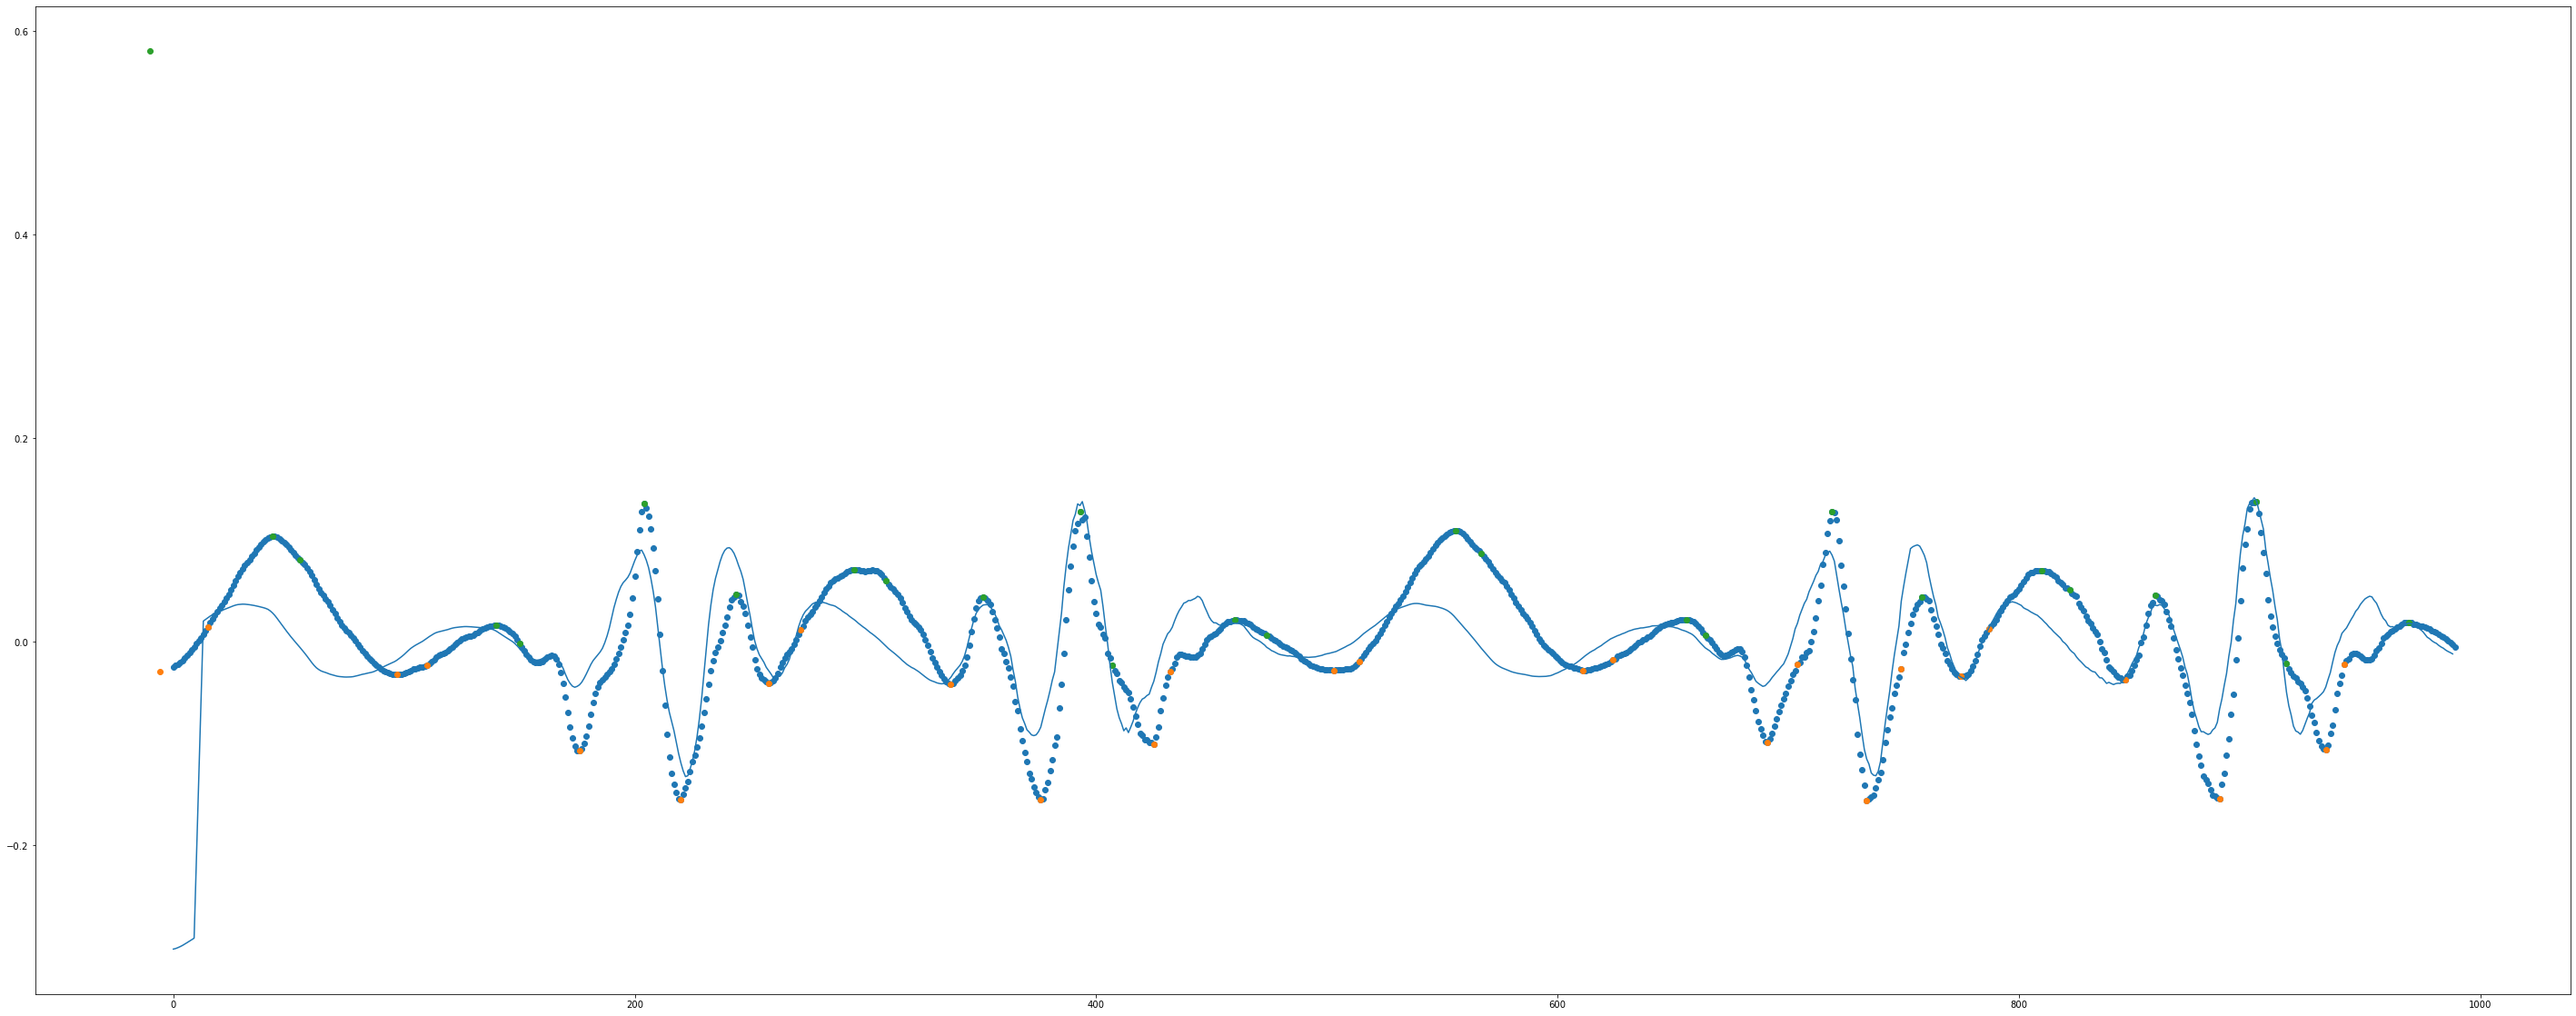

In [40]:
fig,ax = plt.subplots(1,1,figsize= (50,20))
# plt.plot(np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i for i in range(0,len(avg_error[10:]))],np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i-10 for i in min_index], [avg_error[i]- np.mean(avg_error[10:]) for i in min_index])
plt.scatter([i-10 for i in max_index], [avg_error[i]- np.mean(avg_error[10:]) for i in max_index])
plt.plot(np.asarray(deri[10:])*10)
plt.show()

array([False, False, False, ...,  True,  True,  True])